In [1]:
from dbo.simulator.TestFunctions import *
from dbo.acquisition.DEI import DiverseExpectedImprovement
from dbo.acquisition.Wrappers import (EIWrapper, DEIWrapper, KGWrapper)
from dbo.tester.Tester import *
from dbo.metrics.ExperimentMetric import *
from botorch.acquisition import ExpectedImprovement
from dbo.plotter.Plotter import *
from dbo.plotter.SimPlotter import *
import pickle
import json

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
exp_2d = open("results/experiment_2d.pkl",'rb')
exp_hd = open("results/experiment_hd.pkl",'rb')
exp_lunar = open("results/experiment_lunar.pkl",'rb')

In [3]:
experiment_2d_list = pickle.load(exp_2d)
experiment_hd_list = pickle.load(exp_hd)
experiment_lunar_list = pickle.load(exp_lunar)


In [4]:
metrics = ExperimentMetrics()
df_2d = metrics.get_dataframe(experiment_2d_list, 0.3)
df_hd = metrics.get_dataframe(experiment_hd_list, 0.3)

In [5]:
plotter_2d = Plotter(experiment_2d_list)
plotter_hd = Plotter(experiment_hd_list)

In [6]:
plotter_lunar = SimPlotter(experiment_lunar_list)

In [7]:
minima_2d = {
    'Branin2DSimulator':[np.array([-3.14, 12.275]), np.array([3.14, 2.275]), np.array([9.42, 2.475])],
    'SixHumpCamel2DSimulator':[np.array([0.09, -0.71]), np.array([-0.09, 0.71])],
    'Griewank2DSimulator':[np.array([0, 0])],
    'Gramacy2DSimulator':[np.array([0.8, 0]), np.array([-0.8, 0])],
    'HolderTable2DSimulator':[np.array([8.05, 9.66]), np.array([-8.05, 9.66]), np.array([8.05, -9.66]), np.array([-8.05, -9.66])]
}


In [8]:
df_2d

,sim,acqf,num_sol,curr_max,avg_dist,num_cluster,trial
0,Branin2DSimulator,DEIWrapper,3,-0.456539,0.029361,1,1
1,Branin2DSimulator,EIWrapper,22,-0.400427,7.835668,3,1
2,Branin2DSimulator,KGWrapper,2,-0.414440,6.396058,1,1
3,Griewank2DSimulator,DEIWrapper,32,-0.000032,1.833871,2,1
4,Griewank2DSimulator,EIWrapper,30,-0.000758,4.834708,3,1
...,...,...,...,...,...,...,...
745,HolderTable2DSimulator,EIWrapper,8,19.193102,6.702083,2,50
746,HolderTable2DSimulator,KGWrapper,3,18.471867,1.674781,1,50
747,Gramacy2DSimulator,DEIWrapper,13,0.428296,0.950148,2,50
748,Gramacy2DSimulator,EIWrapper,24,0.428820,0.095649,3,50


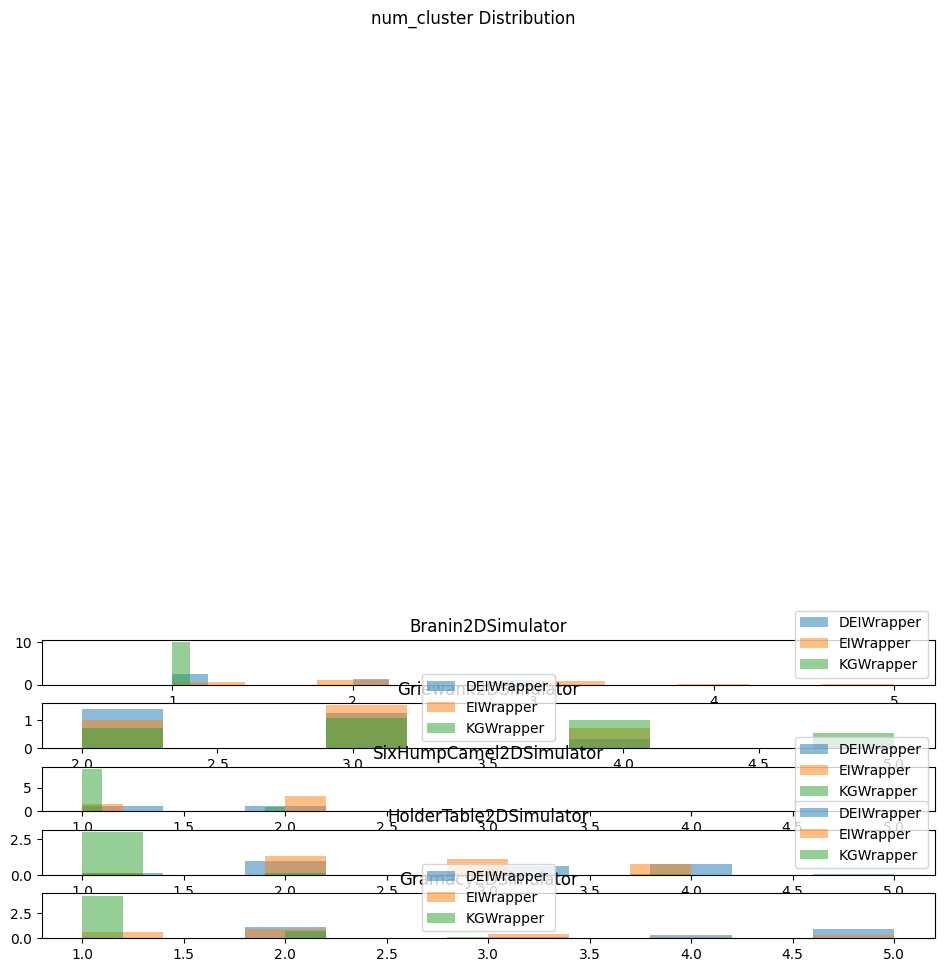

In [9]:
plotter_2d.plot_feature('num_cluster')

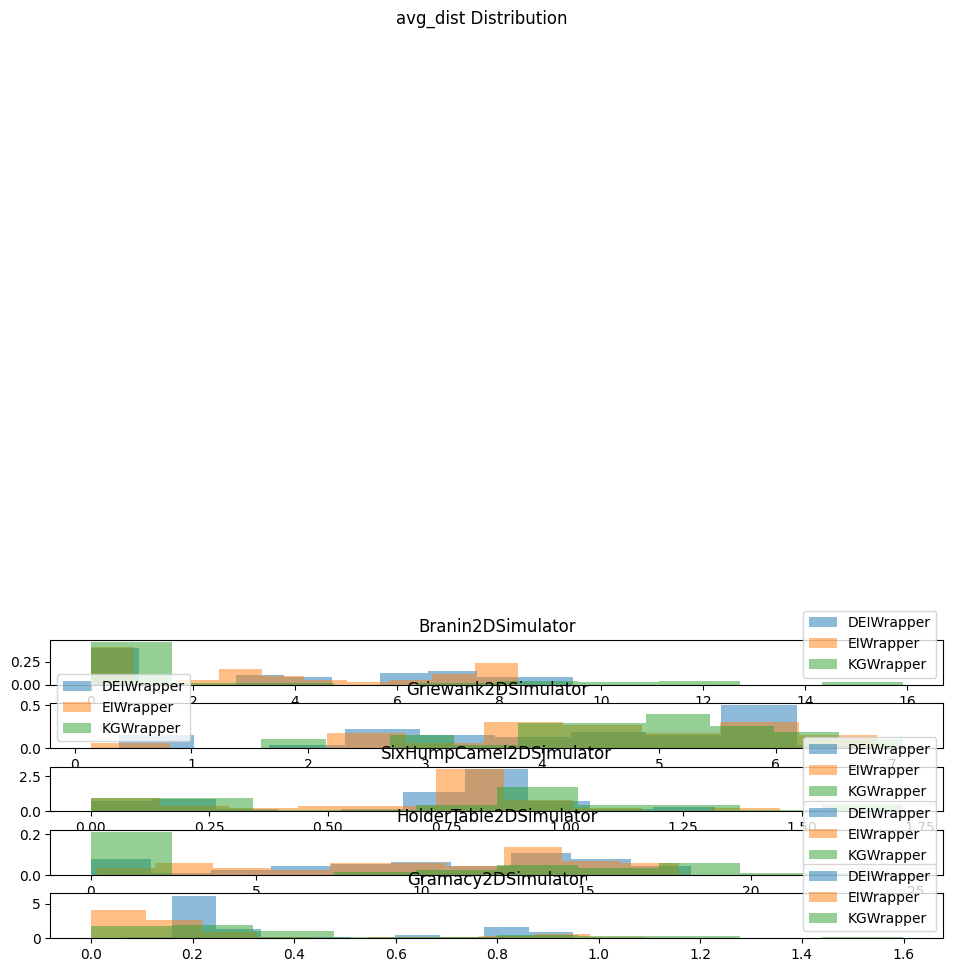

In [10]:
plotter_2d.plot_feature('avg_dist')

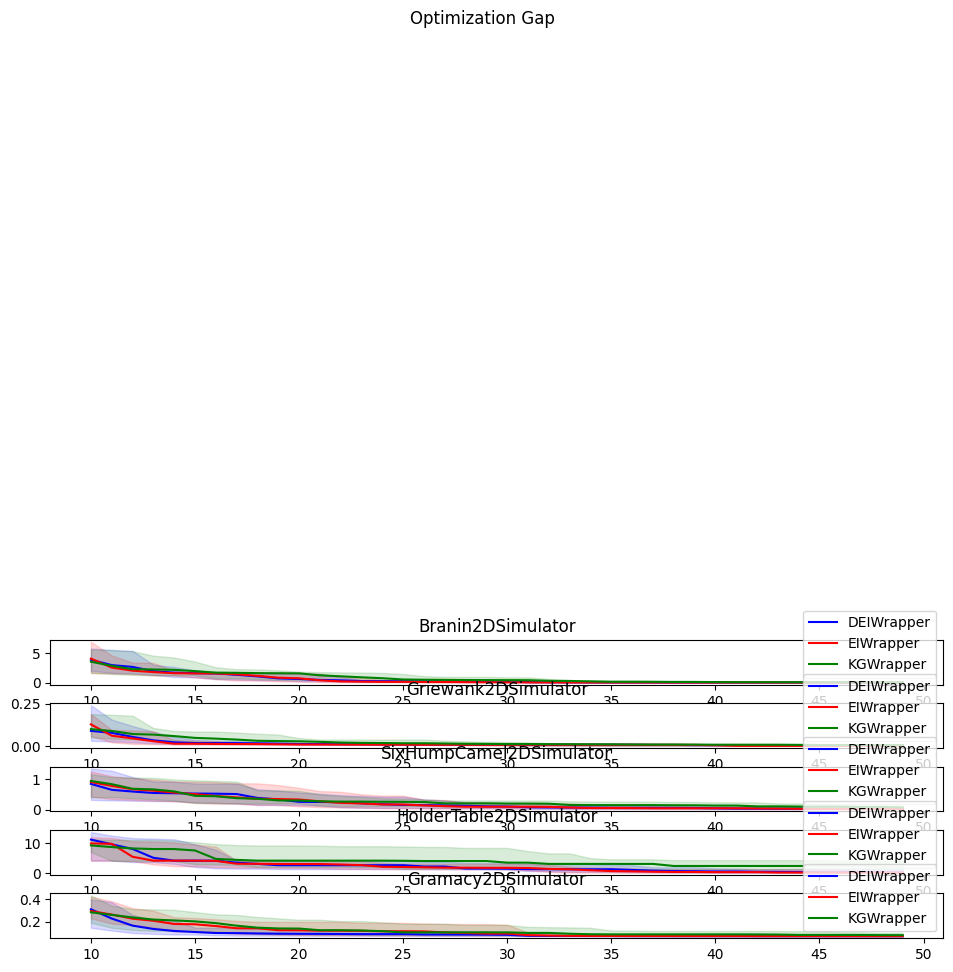

In [11]:
plotter_2d.plot_opt_gap(10)

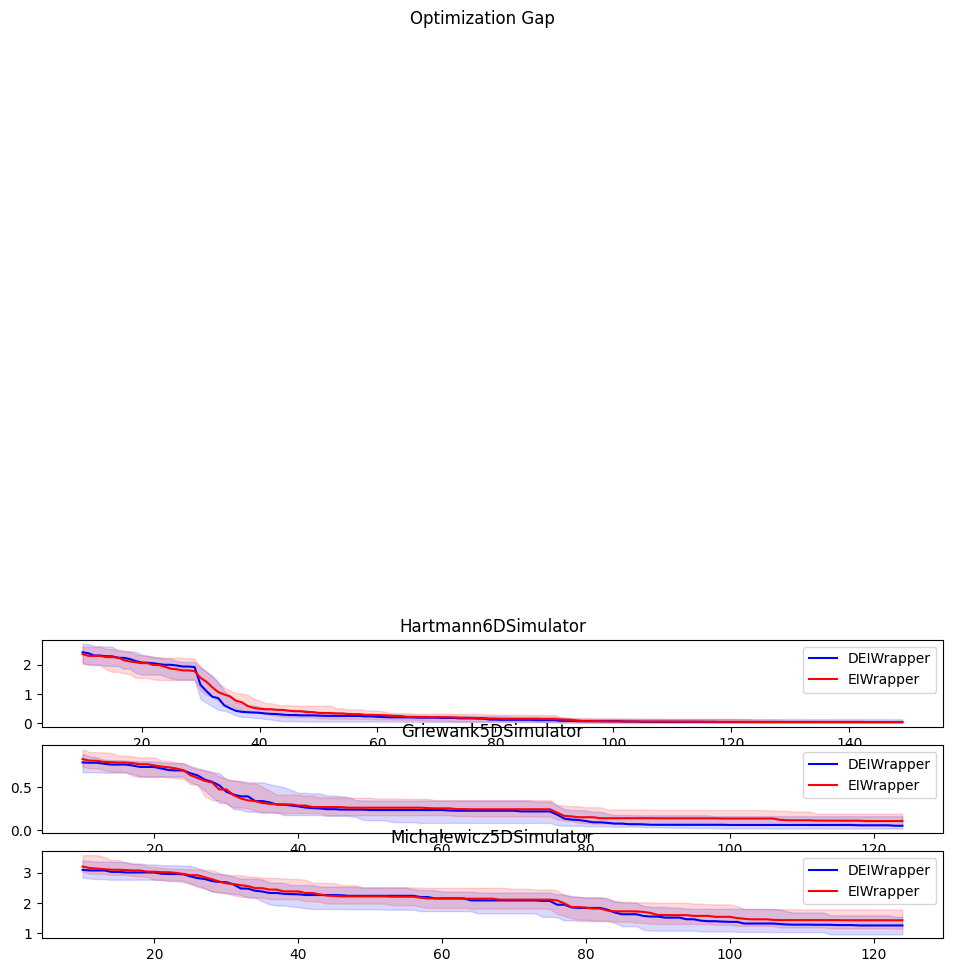

In [12]:
plotter_hd.plot_opt_gap(10)

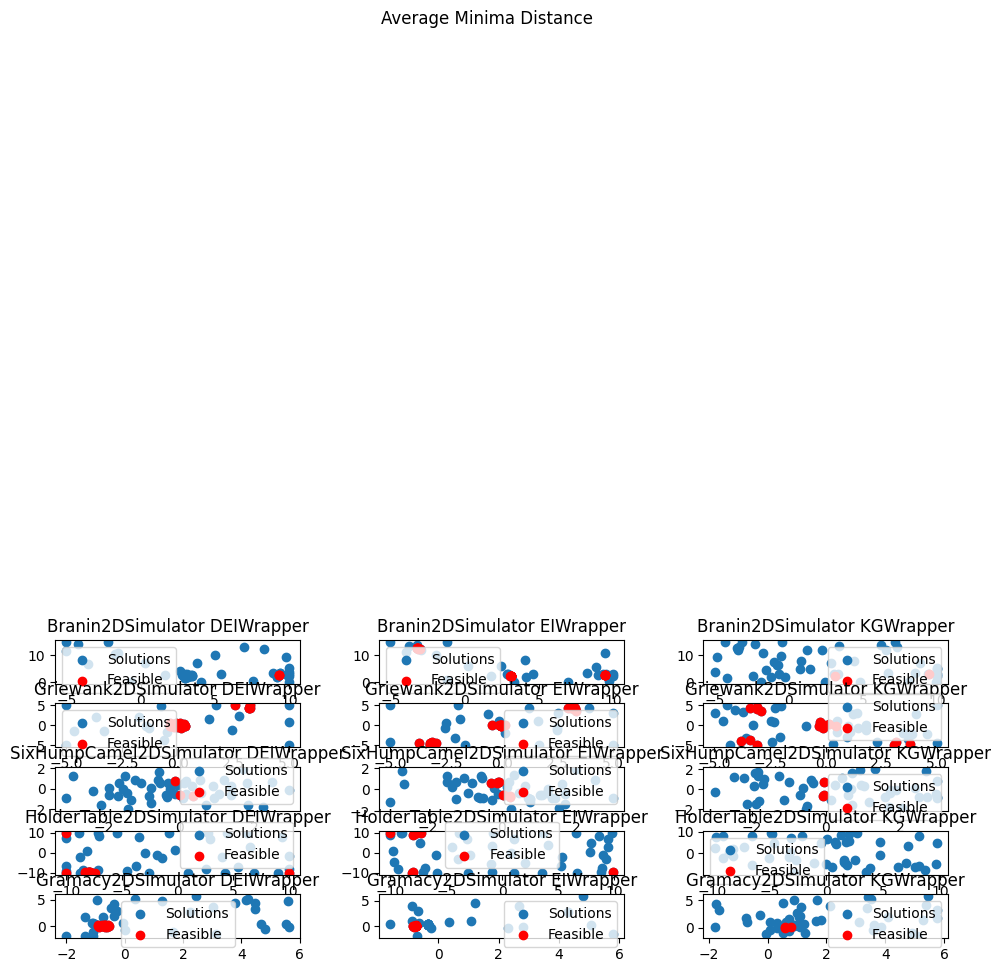

In [13]:
plotter_2d.plot_scatter_2d(1)

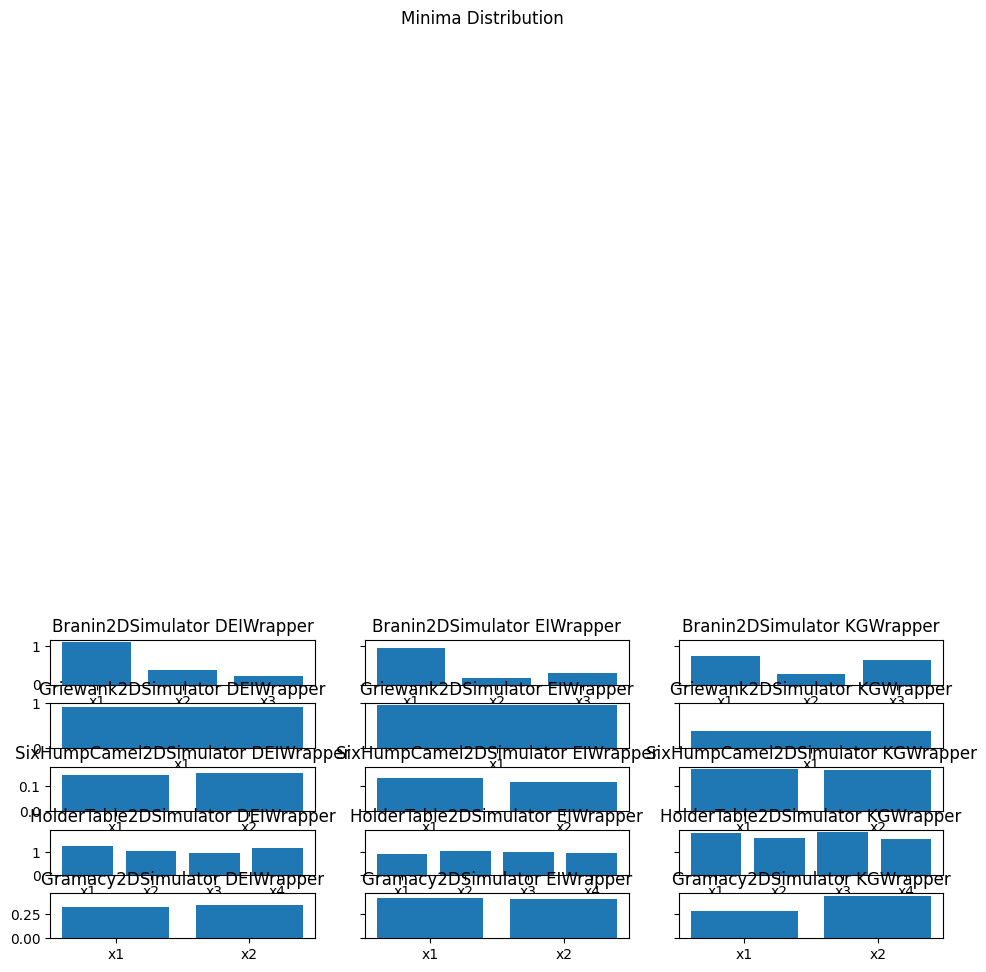

In [14]:
plotter_2d.plot_local_minima(minima_2d)

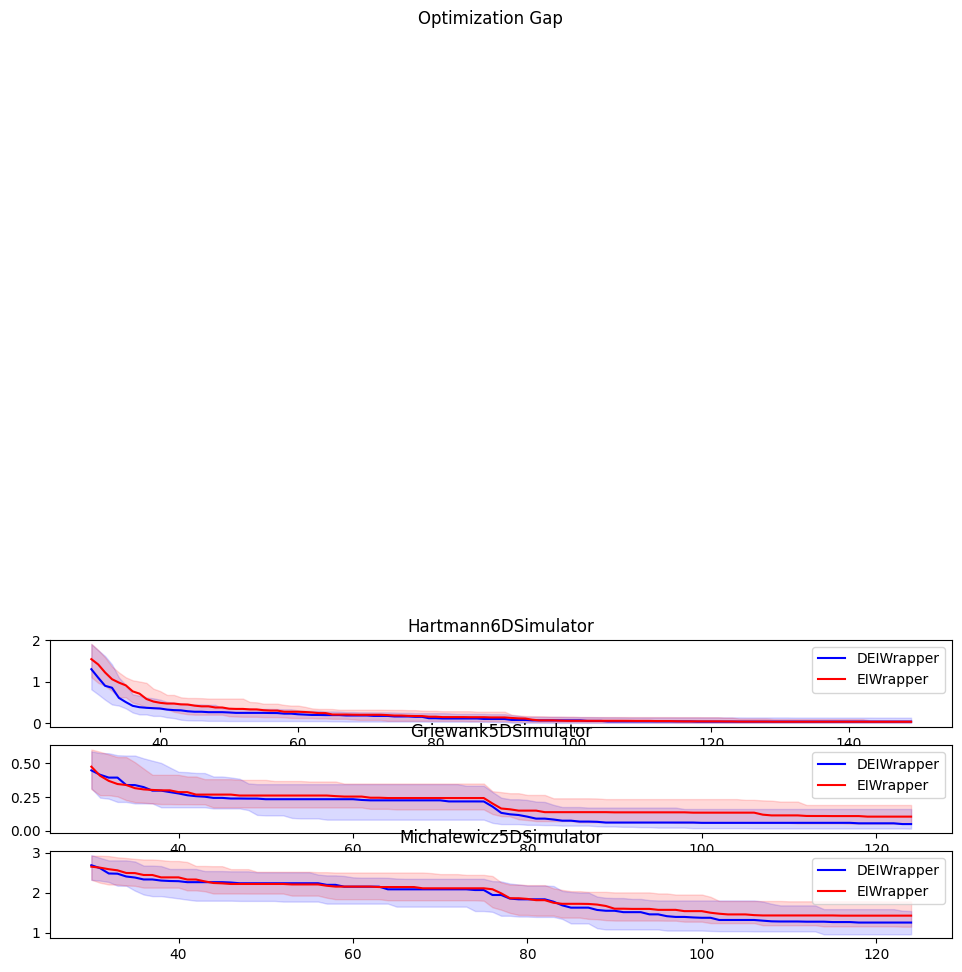

In [15]:
plotter_hd.plot_opt_gap(30)

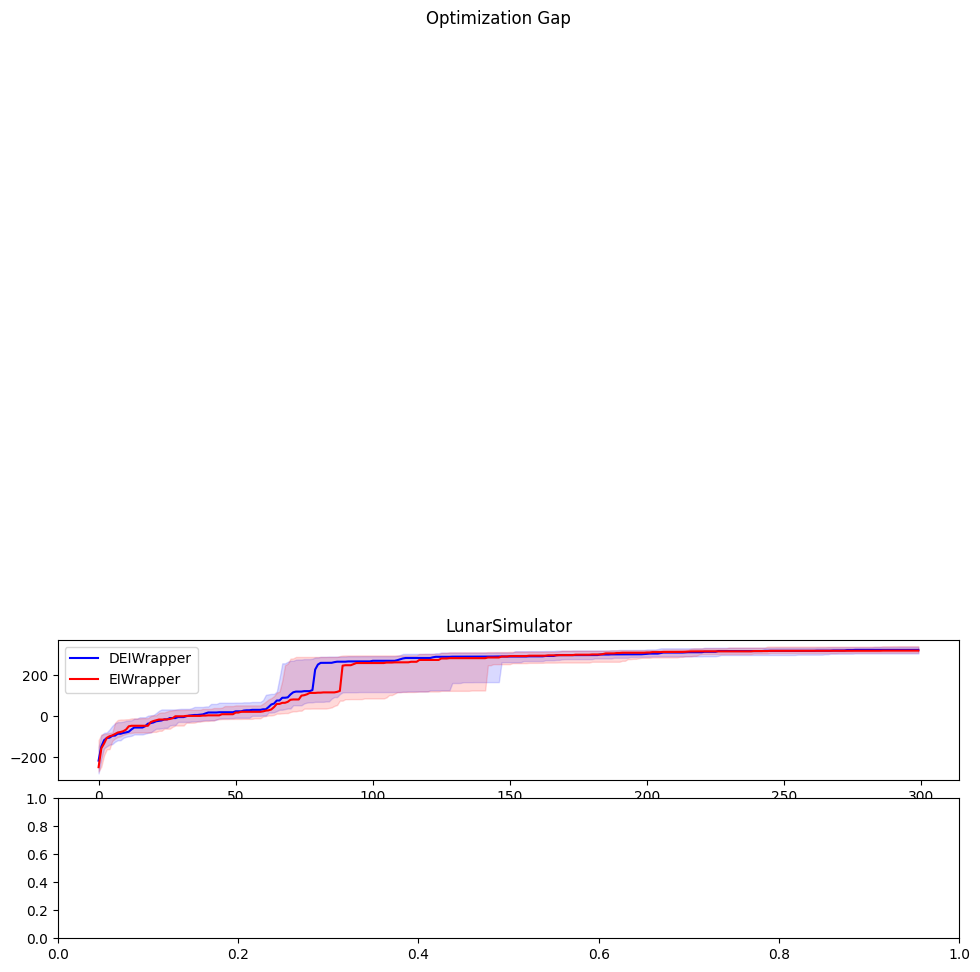

In [16]:
plotter_lunar.plot_max(0)